In [1]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [2]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Sediment Diffusivity Tests

Grounding Line plotting - Sediment Diffusivity = 0

In [3]:
gl_run_title_kdiff_0 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=0")
kdiff_0 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_01__19_41_06_kdiff0.pkl.gz"
with gzip.open(kdiff_0, 'rb') as f:
    DATA_dict_kdiff_0 = pickle.load(f)

In [4]:
bed_dict = DATA_dict_kdiff_0['bed_dict']
base_dict = DATA_dict_kdiff_0['base_dict']
surf_dict= DATA_dict_kdiff_0 ['surf_dict']
sed_dict = DATA_dict_kdiff_0['sed_dict']
H_dict = DATA_dict_kdiff_0['H_dict']
us_dict0 = DATA_dict_kdiff_0['us_dict']
ub_dict = DATA_dict_kdiff_0['ub_dict']
Hs_dict = DATA_dict_kdiff_0['Hs_dict']
GL_dict = DATA_dict_kdiff_0['GL_dict']
Qs_dict = DATA_dict_kdiff_0['Qs_dict']

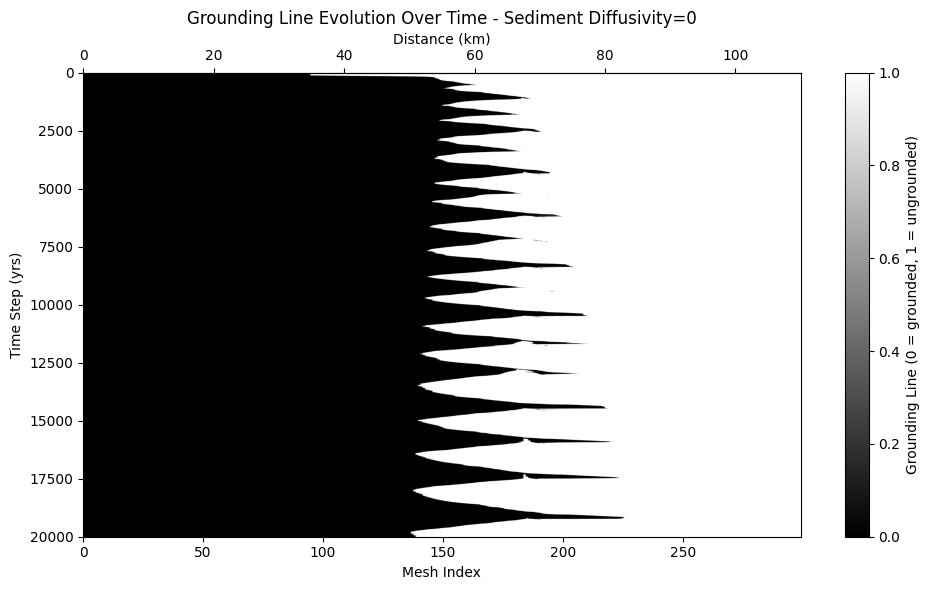

In [5]:
GL_dict = DATA_dict_kdiff_0['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_0)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [6]:
gl_positions_kdiff0 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff0.append(idx)

gl_positions_kdiff0 = np.array(gl_positions_kdiff0)
GL_km_kdiff0 = mesh_index_to_km(gl_positions_kdiff0)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff0 = GL_km_kdiff0[mask]

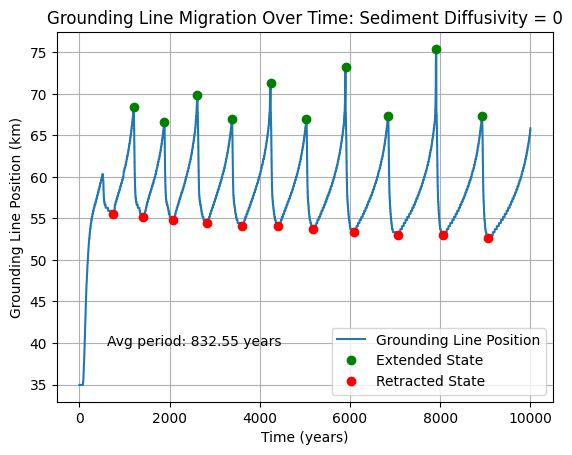

Mean cycle period: 832.55 years
[ 665.37930754  664.46176963  768.04528588  770.70223967  788.2216009
  772.89752063  909.84589422  983.50598754  998.94379557 1003.50246394]
Mean advance amplitude: 69.35 km
[68.42809365 66.58862876 69.89966555 66.95652174 71.37123746 66.95652174
 73.21070234 67.32441472 75.4180602  67.32441472]
Mean retreat amplitude: 53.98 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 54.08026756
 53.71237458 53.34448161 52.97658863 52.97658863 52.60869565]


In [7]:
peaks_kdiff0, _ = find_peaks(GL_km_kdiff0, prominence=5) 
troughs_kdiff_0, _ = find_peaks(-GL_km_kdiff0, prominence=2)     
periods_kdiff0 = np.diff(np.array(time)[troughs_kdiff_0])
adv_dists_kdiff0 = GL_km_kdiff0[peaks_kdiff0]
ret_dists__kdiff0 = GL_km_kdiff0[troughs_kdiff_0]


plt.plot(time, GL_km_kdiff0, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff0], GL_km_kdiff0[peaks_kdiff0], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff_0], GL_km_kdiff0[troughs_kdiff_0], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff0):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 0")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff0):.2f} years")
print(periods_kdiff0)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff0):.2f} km")
print(adv_dists_kdiff0)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff0):.2f} km")
print(ret_dists__kdiff0)


Grounding Line plotting - Sediment Diffusivity = 5

In [8]:
gl_run_title_kdiff_5 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=5")
kdiff_5 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_01__21_24_17_kdiff5.pkl.gz"
with gzip.open(kdiff_5, 'rb') as f:
    DATA_dict_kdiff_5 = pickle.load(f)

In [9]:
bed_dict = DATA_dict_kdiff_5['bed_dict']
base_dict = DATA_dict_kdiff_5['base_dict']
surf_dict= DATA_dict_kdiff_5 ['surf_dict']
sed_dict = DATA_dict_kdiff_5['sed_dict']
H_dict = DATA_dict_kdiff_5['H_dict']
us_dict5 = DATA_dict_kdiff_5['us_dict']
ub_dict = DATA_dict_kdiff_5['ub_dict']
Hs_dict = DATA_dict_kdiff_5['Hs_dict']
GL_dict = DATA_dict_kdiff_5['GL_dict']
Qs_dict = DATA_dict_kdiff_5['Qs_dict']

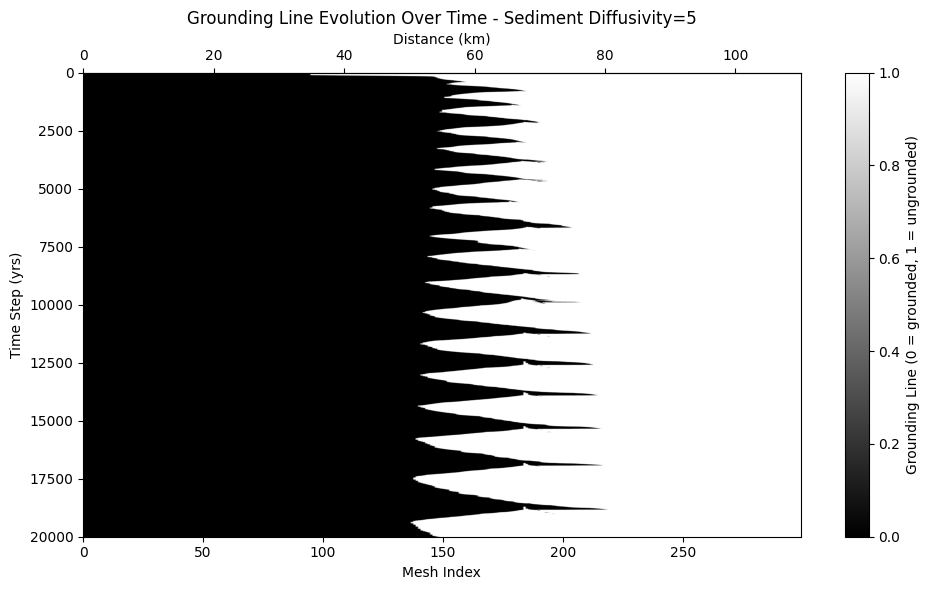

In [10]:
GL_dict = DATA_dict_kdiff_5['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_5)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [11]:
gl_positions_kdiff5 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff5.append(idx)

gl_positions_kdiff5 = np.array(gl_positions_kdiff5)
GL_km_kdiff5 = mesh_index_to_km(gl_positions_kdiff5)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff5 = GL_km_kdiff5[mask]

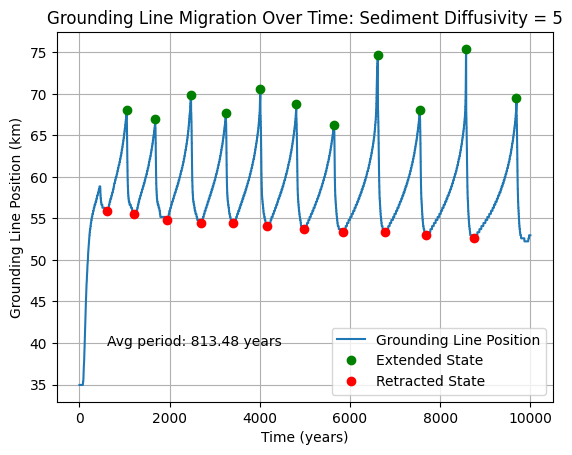

Mean cycle period: 813.48 years
[ 599.09078567  734.22319182  759.26880374  705.91606583  754.1138339
  823.11174969  869.29846009  923.22665756  910.61847057 1055.9298487 ]
Mean advance amplitude: 69.63 km
[68.06020067 66.95652174 69.89966555 67.69230769 70.63545151 68.79598662
 66.22073579 74.68227425 68.06020067 75.4180602  69.53177258]
Mean retreat amplitude: 54.11 km
[55.91973244 55.55183946 54.81605351 54.44816054 54.44816054 54.08026756
 53.71237458 53.34448161 53.34448161 52.97658863 52.60869565]


In [12]:
peaks_kdiff5, _ = find_peaks(GL_km_kdiff5, prominence=5) 
troughs_kdiff5, _ = find_peaks(-GL_km_kdiff5, prominence=2)     
periods_kdiff5 = np.diff(np.array(time)[troughs_kdiff5])
adv_dists_kdiff5 = GL_km_kdiff5[peaks_kdiff5]
ret_dists__kdiff5 = GL_km_kdiff5[troughs_kdiff5]


plt.plot(time, GL_km_kdiff5, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff5], GL_km_kdiff5[peaks_kdiff5], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff5], GL_km_kdiff5[troughs_kdiff5], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff5):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 5")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff5):.2f} years")
print(periods_kdiff5)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff5):.2f} km")
print(adv_dists_kdiff5)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff5):.2f} km")
print(ret_dists__kdiff5)


Grounding Line plotting - Sediment Diffusivity = 10

In [13]:
gl_run_title_kdiff_10 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=10")
kdiff_10 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_01__22_43_25_kdiff10.pkl.gz"
with gzip.open(kdiff_10, 'rb') as f:
    DATA_dict_kdiff_10 = pickle.load(f)

In [14]:
bed_dict = DATA_dict_kdiff_10['bed_dict']
base_dict = DATA_dict_kdiff_10['base_dict']
surf_dict= DATA_dict_kdiff_10 ['surf_dict']
sed_dict = DATA_dict_kdiff_10['sed_dict']
H_dict = DATA_dict_kdiff_10['H_dict']
us_dict10 = DATA_dict_kdiff_10['us_dict']
ub_dict = DATA_dict_kdiff_10['ub_dict']
Hs_dict = DATA_dict_kdiff_10['Hs_dict']
GL_dict = DATA_dict_kdiff_10['GL_dict']
Qs_dict = DATA_dict_kdiff_10['Qs_dict']

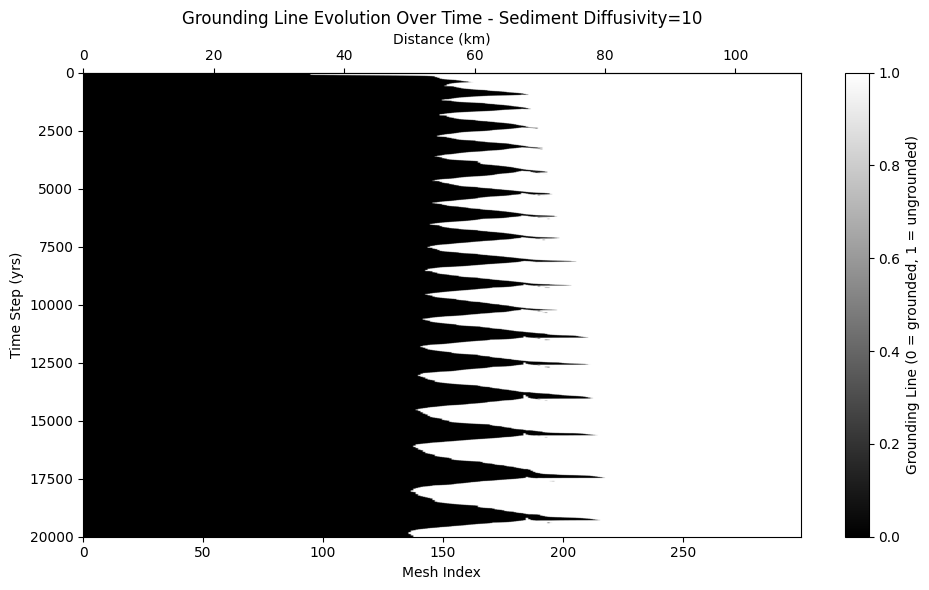

In [15]:
GL_dict = DATA_dict_kdiff_10['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_10)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [16]:
gl_positions_kdiff10 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff10.append(idx)

gl_positions_kdiff10 = np.array(gl_positions_kdiff10)
GL_km_kdiff10 = mesh_index_to_km(gl_positions_kdiff10)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff10 = GL_km_kdiff10[mask]

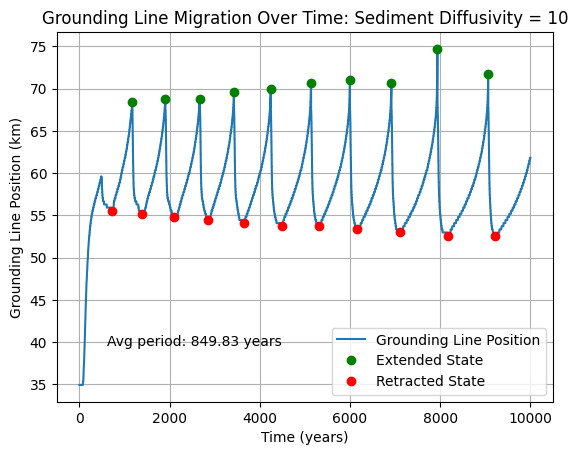

Mean cycle period: 849.83 years
[ 669.14308033  710.62768304  747.35266423  793.70808244  847.2271286
  820.9266027   840.95203095  959.25210774 1064.19937759 1044.90960564]
Mean advance amplitude: 70.41 km
[68.42809365 68.79598662 68.79598662 69.53177258 69.89966555 70.63545151
 71.00334448 70.63545151 74.68227425 71.73913043]
Mean retreat amplitude: 53.91 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.71237458 53.34448161 52.97658863 52.60869565 52.60869565]


In [17]:
peaks_kdiff10, _ = find_peaks(GL_km_kdiff10, prominence=5) 
troughs_kdiff10, _ = find_peaks(-GL_km_kdiff10, prominence=2)     
periods_kdiff10 = np.diff(np.array(time)[troughs_kdiff10])
adv_dists_kdiff10 = GL_km_kdiff10[peaks_kdiff10]
ret_dists__kdiff10 = GL_km_kdiff10[troughs_kdiff10]


plt.plot(time, GL_km_kdiff10, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff10], GL_km_kdiff10[peaks_kdiff10], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff10], GL_km_kdiff10[troughs_kdiff10], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff10):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 10")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff10):.2f} years")
print(periods_kdiff10)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff10):.2f} km")
print(adv_dists_kdiff10)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff10):.2f} km")
print(ret_dists__kdiff10)


Grounding Line plotting - Sediment Diffusivity = 15

In [18]:
gl_run_title_kdiff_15 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=15")
kdiff_15 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_02__00_46_36_kdiff15.pkl.gz"
with gzip.open(kdiff_15, 'rb') as f:
    DATA_dict_kdiff_15 = pickle.load(f)

In [19]:
bed_dict = DATA_dict_kdiff_15['bed_dict']
base_dict = DATA_dict_kdiff_15['base_dict']
surf_dict= DATA_dict_kdiff_15 ['surf_dict']
sed_dict = DATA_dict_kdiff_15['sed_dict']
H_dict = DATA_dict_kdiff_15['H_dict']
us_dict15 = DATA_dict_kdiff_15['us_dict']
ub_dict = DATA_dict_kdiff_15['ub_dict']
Hs_dict = DATA_dict_kdiff_15['Hs_dict']
GL_dict = DATA_dict_kdiff_15['GL_dict']
Qs_dict = DATA_dict_kdiff_15['Qs_dict']

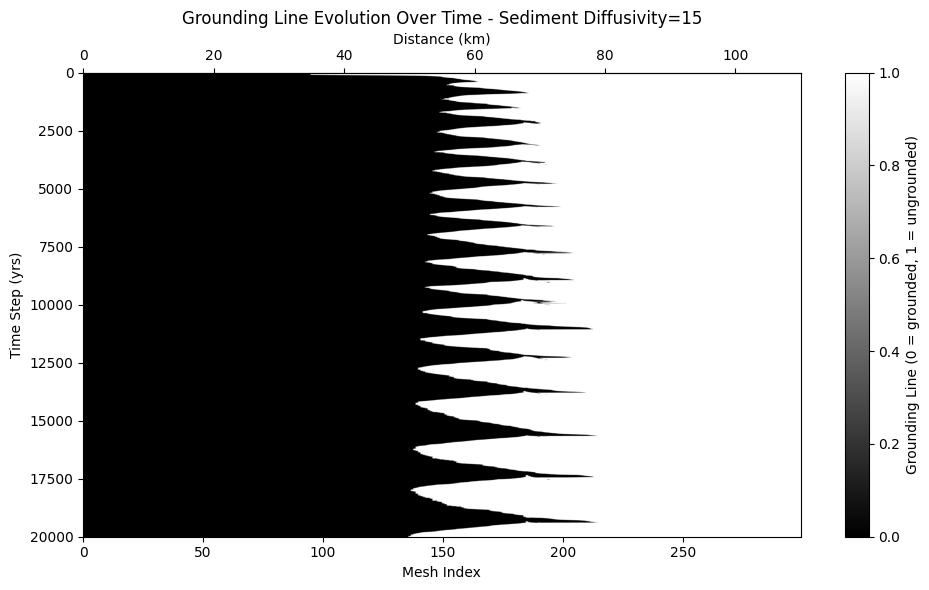

In [20]:
GL_dict = DATA_dict_kdiff_15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [21]:
gl_positions_kdiff15 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff15.append(idx)

gl_positions_kdiff15 = np.array(gl_positions_kdiff15)
GL_km_kdiff15 = mesh_index_to_km(gl_positions_kdiff15)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff15 = GL_km_kdiff15[mask]

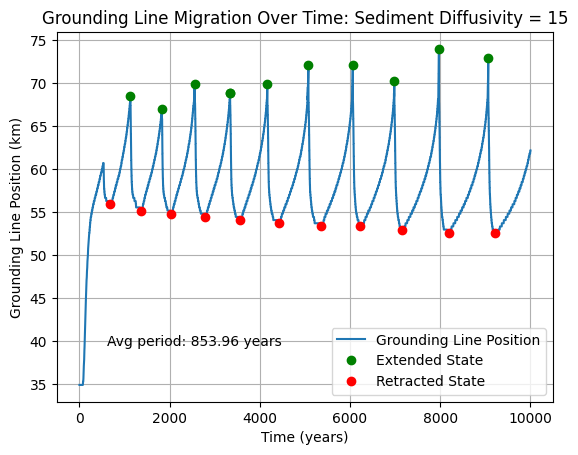

Mean cycle period: 853.96 years
[ 689.12624418  654.97739236  750.63744077  791.98385628  849.59457264
  939.66244069  871.70252184  917.90117248 1038.93161121 1035.07040021]
Mean advance amplitude: 70.37 km
[68.42809365 66.95652174 69.89966555 68.79598662 68.79598662 69.89966555
 72.10702341 72.10702341 70.26755853 73.94648829 72.84280936]
Mean retreat amplitude: 53.91 km
[55.91973244 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.60869565]


In [22]:
peaks_kdiff15, _ = find_peaks(GL_km_kdiff15, prominence=5) 
troughs_kdiff15, _ = find_peaks(-GL_km_kdiff15, prominence=2)     
periods_kdiff15 = np.diff(np.array(time)[troughs_kdiff15])
adv_dists_kdiff15 = GL_km_kdiff15[peaks_kdiff15]
ret_dists__kdiff15 = GL_km_kdiff15[troughs_kdiff15]


plt.plot(time, GL_km_kdiff15, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff15], GL_km_kdiff15[peaks_kdiff15], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff15], GL_km_kdiff15[troughs_kdiff15], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff15):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 15")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff15):.2f} years")
print(periods_kdiff15)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff15):.2f} km")
print(adv_dists_kdiff15)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff15):.2f} km")
print(ret_dists__kdiff15)


Grounding Line plotting - Sediment Diffusivity = 20

In [23]:
gl_run_title_kdiff_20 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=20")
kdiff_20 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_02__10_34_04_kdiff20.pkl.gz"
with gzip.open(kdiff_20, 'rb') as f:
    DATA_dict_kdiff_20 = pickle.load(f)

In [24]:
bed_dict = DATA_dict_kdiff_20['bed_dict']
base_dict = DATA_dict_kdiff_20['base_dict']
surf_dict= DATA_dict_kdiff_20 ['surf_dict']
sed_dict = DATA_dict_kdiff_20['sed_dict']
H_dict = DATA_dict_kdiff_20['H_dict']
us_dict20 = DATA_dict_kdiff_20['us_dict']
ub_dict = DATA_dict_kdiff_20['ub_dict']
Hs_dict = DATA_dict_kdiff_20['Hs_dict']
GL_dict = DATA_dict_kdiff_20['GL_dict']
Qs_dict = DATA_dict_kdiff_20['Qs_dict']

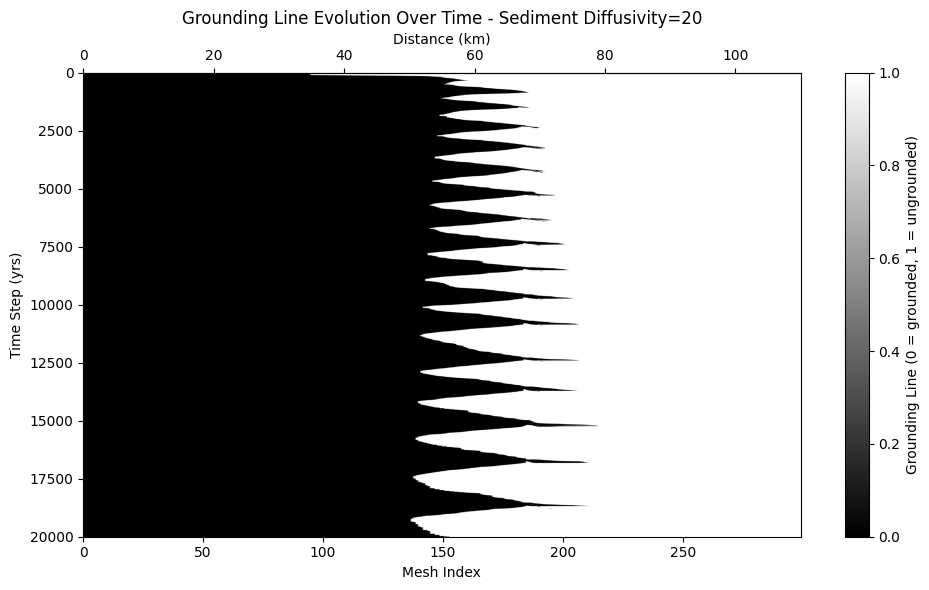

In [25]:
GL_dict = DATA_dict_kdiff_20['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_20)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [26]:
gl_positions_kdiff20 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff20.append(idx)

gl_positions_kdiff20 = np.array(gl_positions_kdiff20)
GL_km_kdiff20 = mesh_index_to_km(gl_positions_kdiff20)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff20 = GL_km_kdiff20[mask]

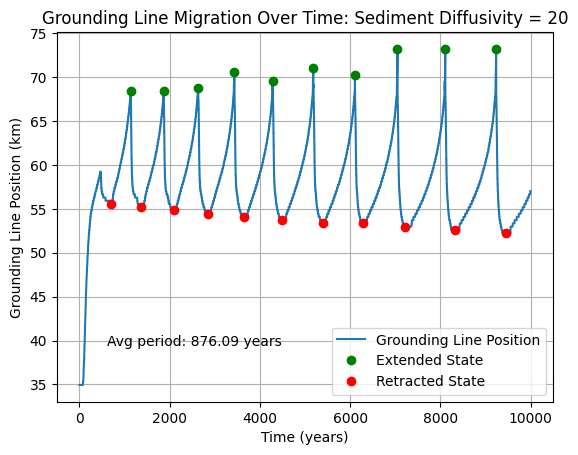

Mean cycle period: 876.09 years
[ 674.60801648  721.10593334  755.54657117  808.58369559  835.96918
  911.25251579  878.57957437  932.10549817 1105.41872961 1137.69453322]
Mean advance amplitude: 70.67 km
[68.42809365 68.42809365 68.79598662 70.63545151 69.53177258 71.00334448
 70.26755853 73.21070234 73.21070234 73.21070234]
Mean retreat amplitude: 53.85 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.24080268]


In [27]:
peaks_kdiff20, _ = find_peaks(GL_km_kdiff20, prominence=5) 
troughs_kdiff20, _ = find_peaks(-GL_km_kdiff20, prominence=3)     
periods_kdiff20 = np.diff(np.array(time)[troughs_kdiff20])
adv_dists_kdiff20 = GL_km_kdiff20[peaks_kdiff20]
ret_dists__kdiff20 = GL_km_kdiff20[troughs_kdiff20]


plt.plot(time, GL_km_kdiff20, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff20], GL_km_kdiff20[peaks_kdiff20], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff20], GL_km_kdiff20[troughs_kdiff20], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff20):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 20")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff20):.2f} years")
print(periods_kdiff20)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff20):.2f} km")
print(adv_dists_kdiff20)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff20):.2f} km")
print(ret_dists__kdiff20)


Grounding Line plotting - Sediment Diffusivity = 25

In [28]:
gl_run_title_kdiff_25 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=25")
kdiff_25 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_02__13_46_20_kdiff25.pkl.gz"
with gzip.open(kdiff_25, 'rb') as f:
    DATA_dict_kdiff_25 = pickle.load(f)

In [29]:
bed_dict = DATA_dict_kdiff_25['bed_dict']
base_dict = DATA_dict_kdiff_25['base_dict']
surf_dict= DATA_dict_kdiff_25 ['surf_dict']
sed_dict = DATA_dict_kdiff_25['sed_dict']
H_dict = DATA_dict_kdiff_25['H_dict']
us_dict25 = DATA_dict_kdiff_25['us_dict']
ub_dict = DATA_dict_kdiff_25['ub_dict']
Hs_dict = DATA_dict_kdiff_25['Hs_dict']
GL_dict = DATA_dict_kdiff_25['GL_dict']
Qs_dict = DATA_dict_kdiff_25['Qs_dict']

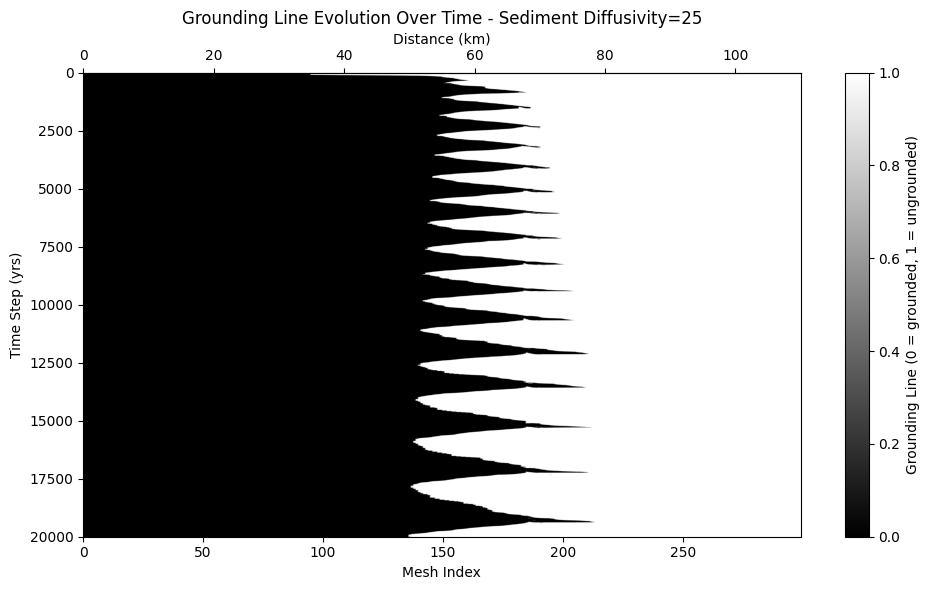

In [30]:
GL_dict = DATA_dict_kdiff_25['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_25)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [31]:
gl_positions_kdiff25 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff25.append(idx)

gl_positions_kdiff25 = np.array(gl_positions_kdiff25)
GL_km_kdiff25 = mesh_index_to_km(gl_positions_kdiff25)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff25 = GL_km_kdiff25[mask]

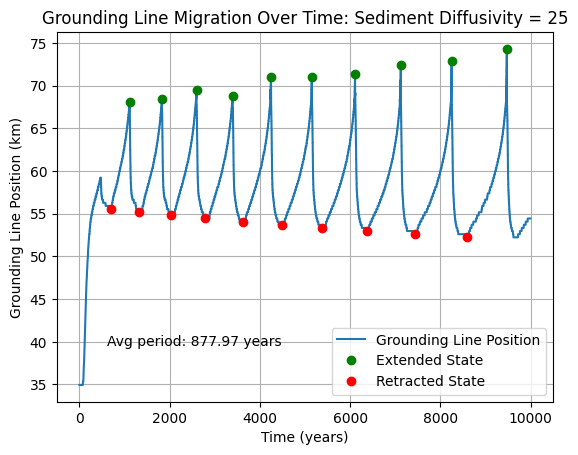

Mean cycle period: 877.97 years
[ 636.8199034   708.71765398  750.75507467  839.54319663  856.86045564
  898.18051862  982.70868611 1072.656699   1155.53028015]
Mean advance amplitude: 70.78 km
[68.06020067 68.42809365 69.53177258 68.79598662 71.00334448 71.00334448
 71.37123746 72.47491639 72.84280936 74.31438127]
Mean retreat amplitude: 53.90 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565 52.24080268]


In [32]:
peaks_kdiff25, _ = find_peaks(GL_km_kdiff25, prominence=5) 
troughs_kdiff25, _ = find_peaks(-GL_km_kdiff25, prominence=3)     
periods_kdiff25 = np.diff(np.array(time)[troughs_kdiff25])
adv_dists_kdiff25 = GL_km_kdiff25[peaks_kdiff25]
ret_dists__kdiff25 = GL_km_kdiff25[troughs_kdiff25]


plt.plot(time, GL_km_kdiff25, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff25], GL_km_kdiff25[peaks_kdiff25], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff25], GL_km_kdiff25[troughs_kdiff25], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff25):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 25")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff25):.2f} years")
print(periods_kdiff25)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff25):.2f} km")
print(adv_dists_kdiff25)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff25):.2f} km")
print(ret_dists__kdiff25)


Grounding Line plotting - Sediment Diffusivity = 30

In [33]:
gl_run_title_kdiff_30 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=30")
kdiff_30 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/kdiff_tests/DATA_Dictionary_2025_05_02__16_18_18_kdiff30.pkl.gz"
with gzip.open(kdiff_30, 'rb') as f:
    DATA_dict_kdiff_30 = pickle.load(f)

In [34]:
bed_dict = DATA_dict_kdiff_30['bed_dict']
base_dict = DATA_dict_kdiff_30['base_dict']
surf_dict= DATA_dict_kdiff_30 ['surf_dict']
sed_dict = DATA_dict_kdiff_30['sed_dict']
H_dict = DATA_dict_kdiff_30['H_dict']
us_dict30 = DATA_dict_kdiff_30['us_dict']
ub_dict = DATA_dict_kdiff_30['ub_dict']
Hs_dict = DATA_dict_kdiff_30['Hs_dict']
GL_dict = DATA_dict_kdiff_30['GL_dict']
Qs_dict = DATA_dict_kdiff_30['Qs_dict']

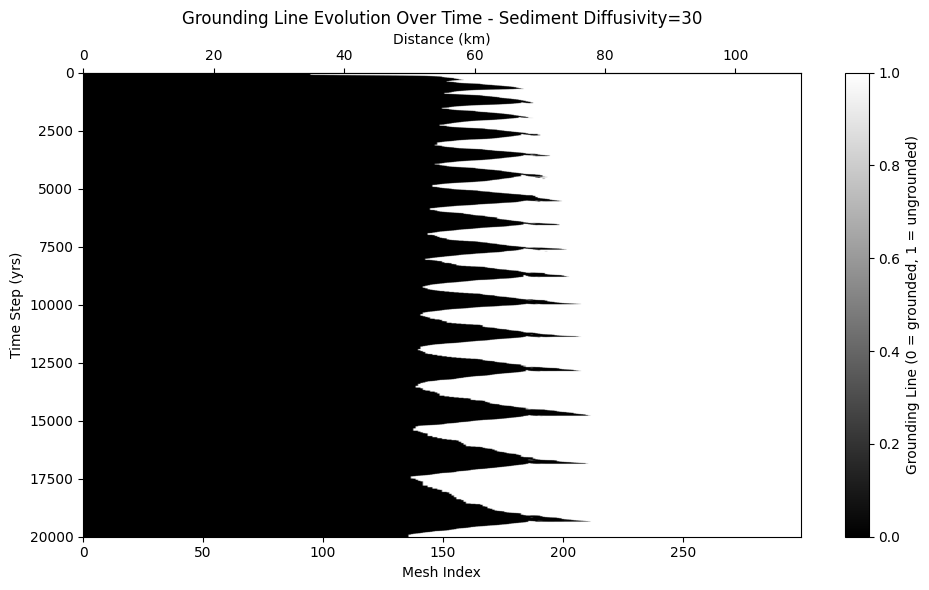

In [35]:
GL_dict = DATA_dict_kdiff_30['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_30)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [36]:
gl_positions_kdiff30 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff30.append(idx)

gl_positions_kdiff30 = np.array(gl_positions_kdiff30)
GL_km_kdiff30 = mesh_index_to_km(gl_positions_kdiff30)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_kdiff30 = GL_km_kdiff30[mask]

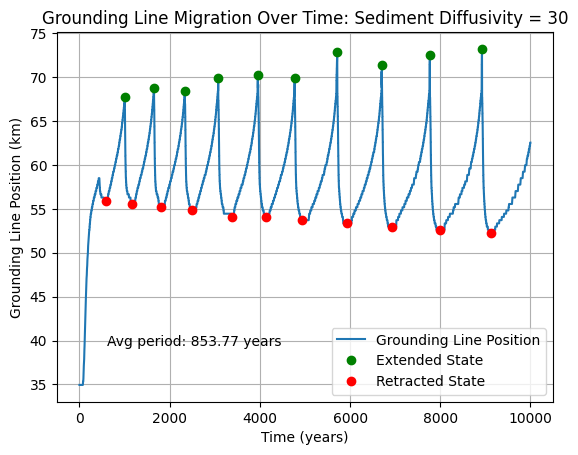

Mean cycle period: 853.77 years
[ 581.98500158  644.36982369  691.34525288  880.43645402  758.84884544
  802.22060743  993.48457331  991.63071638 1068.83873935 1124.52249137]
Mean advance amplitude: 70.49 km
[67.69230769 68.79598662 68.42809365 69.89966555 70.26755853 69.89966555
 72.84280936 71.37123746 72.47491639 73.21070234]
Mean retreat amplitude: 54.05 km
[55.91973244 55.55183946 55.18394649 54.81605351 54.08026756 54.08026756
 53.71237458 53.34448161 52.97658863 52.60869565 52.24080268]


In [37]:
peaks_kdiff30, _ = find_peaks(GL_km_kdiff30, prominence=5) 
troughs_kdiff30, _ = find_peaks(-GL_km_kdiff30, prominence=2)     
periods_kdiff30 = np.diff(np.array(time)[troughs_kdiff30])
adv_dists_kdiff30 = GL_km_kdiff30[peaks_kdiff30]
ret_dists__kdiff30 = GL_km_kdiff30[troughs_kdiff30]


plt.plot(time, GL_km_kdiff30, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff30], GL_km_kdiff30[peaks_kdiff30], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_kdiff30], GL_km_kdiff30[troughs_kdiff30], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff30):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 30")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff30):.2f} years")
print(periods_kdiff30)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff30):.2f} km")
print(adv_dists_kdiff30)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff30):.2f} km")
print(ret_dists__kdiff30)


Grounding Line plotting - Sediment Diffusivity = 50

In [38]:
gl_run_title_kdiff_50 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=50")
kdiff_50 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run11_kdiff50/DATA_Dictionary_2025_03_23__16_19_54.pkl.gz"
with gzip.open(kdiff_50, 'rb') as f:
    DATA_dict_kdiff_50 = pickle.load(f)

In [39]:
bed_dict = DATA_dict_kdiff_50['bed_dict']
base_dict = DATA_dict_kdiff_50['base_dict']
surf_dict= DATA_dict_kdiff_50 ['surf_dict']
sed_dict = DATA_dict_kdiff_50['sed_dict']
H_dict = DATA_dict_kdiff_50['H_dict']
us_dict = DATA_dict_kdiff_50['us_dict']
ub_dict = DATA_dict_kdiff_50['ub_dict']
Hs_dict = DATA_dict_kdiff_50['Hs_dict']
GL_dict = DATA_dict_kdiff_50['GL_dict']
Qs_dict = DATA_dict_kdiff_50['Qs_dict']

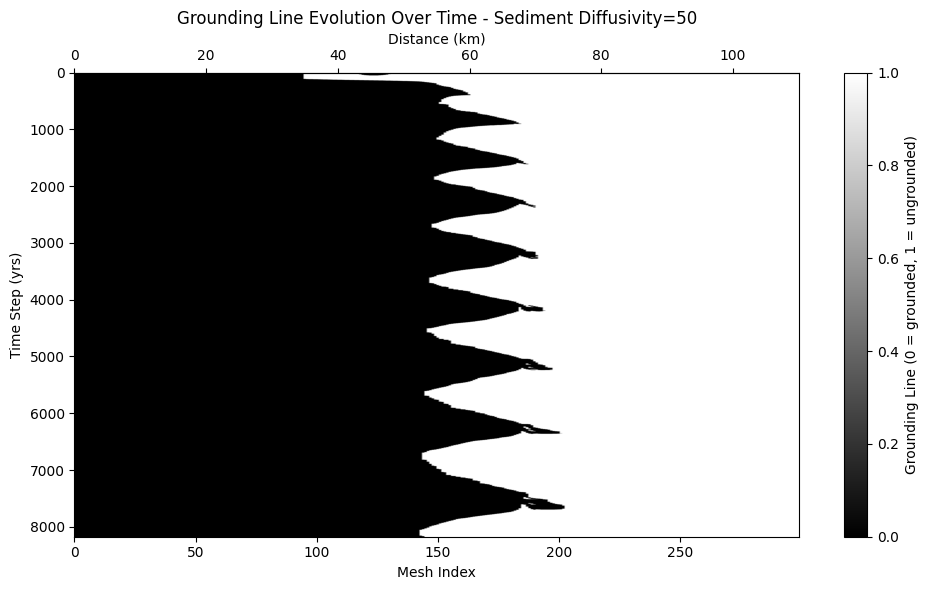

In [40]:
GL_dict = DATA_dict_kdiff_50['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_50)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 75

In [41]:
gl_run_title_kdiff_75 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=75")
kdiff_75 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run16_kdiff75/DATA_Dictionary_2025_03_23__18_05_40.pkl.gz"
with gzip.open(kdiff_75, 'rb') as f:
    DATA_dict_kdiff_75 = pickle.load(f)

In [42]:
bed_dict = DATA_dict_kdiff_75['bed_dict']
base_dict = DATA_dict_kdiff_75['base_dict']
surf_dict= DATA_dict_kdiff_75 ['surf_dict']
sed_dict = DATA_dict_kdiff_75['sed_dict']
H_dict = DATA_dict_kdiff_75['H_dict']
us_dict = DATA_dict_kdiff_75['us_dict']
ub_dict = DATA_dict_kdiff_75['ub_dict']
Hs_dict = DATA_dict_kdiff_75['Hs_dict']
GL_dict = DATA_dict_kdiff_75['GL_dict']
Qs_dict = DATA_dict_kdiff_75['Qs_dict']

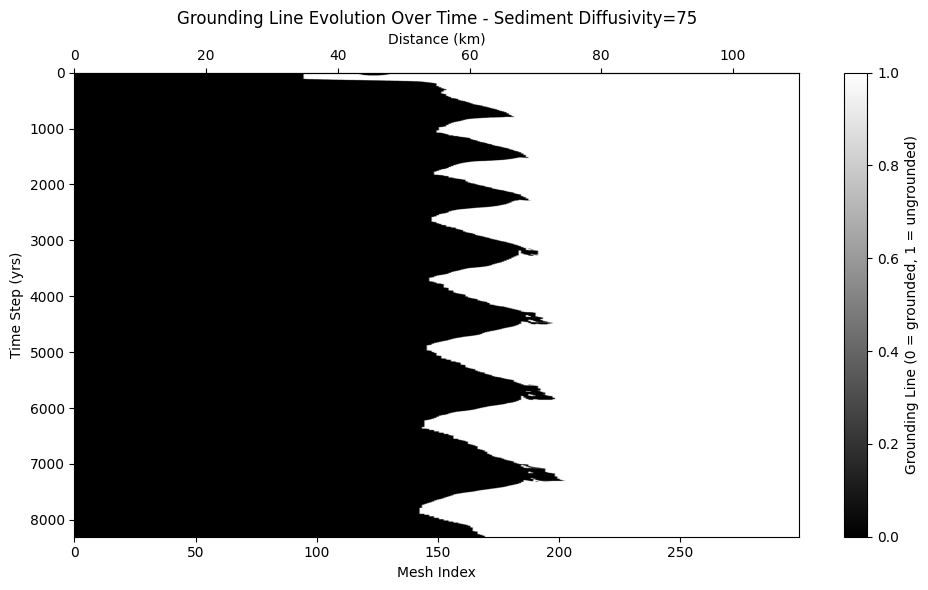

In [43]:
GL_dict = DATA_dict_kdiff_75['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_75)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 100

In [44]:
gl_run_title_kdiff_100 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=100")
kdiff_100 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run21_kdiff100/DATA_Dictionary_2025_03_23__20_07_19.pkl.gz"
with gzip.open(kdiff_100, 'rb') as f:
    DATA_dict_kdiff_100 = pickle.load(f)

In [45]:
bed_dict = DATA_dict_kdiff_100['bed_dict']
base_dict = DATA_dict_kdiff_100['base_dict']
surf_dict= DATA_dict_kdiff_100 ['surf_dict']
sed_dict = DATA_dict_kdiff_100['sed_dict']
H_dict = DATA_dict_kdiff_100['H_dict']
us_dict = DATA_dict_kdiff_100['us_dict']
ub_dict = DATA_dict_kdiff_100['ub_dict']
Hs_dict = DATA_dict_kdiff_100['Hs_dict']
GL_dict = DATA_dict_kdiff_100['GL_dict']
Qs_dict = DATA_dict_kdiff_100['Qs_dict']

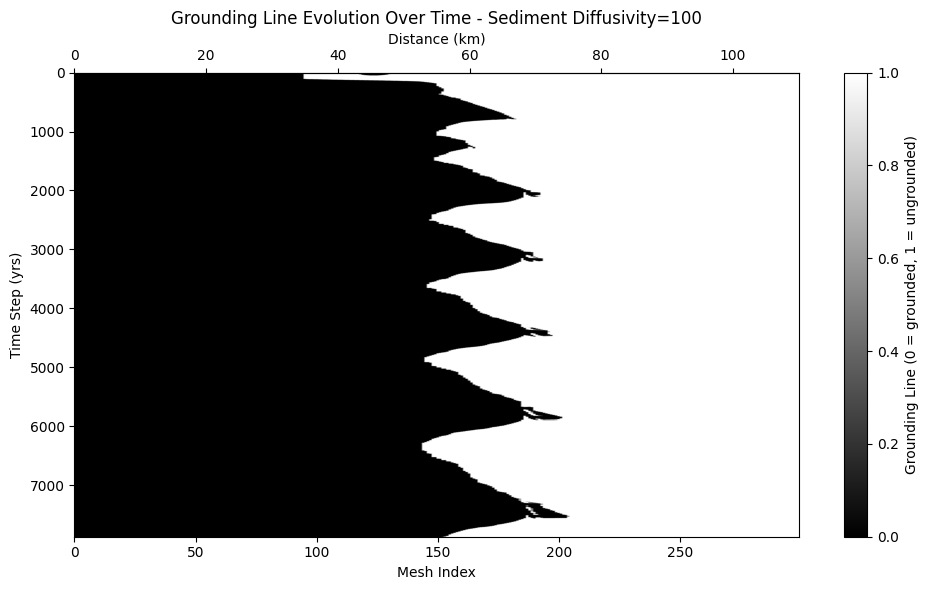

In [46]:
GL_dict = DATA_dict_kdiff_100['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_100)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 150

In [47]:
gl_run_title_kdiff_150 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=150")
kdiff_150 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run31_kdiff150/DATA_Dictionary_2025_03_23__23_39_52.pkl.gz"
with gzip.open(kdiff_150, 'rb') as f:
    DATA_dict_kdiff_150 = pickle.load(f)

In [48]:
bed_dict = DATA_dict_kdiff_150['bed_dict']
base_dict = DATA_dict_kdiff_150['base_dict']
surf_dict= DATA_dict_kdiff_150 ['surf_dict']
sed_dict = DATA_dict_kdiff_150['sed_dict']
H_dict = DATA_dict_kdiff_150['H_dict']
us_dict = DATA_dict_kdiff_150['us_dict']
ub_dict = DATA_dict_kdiff_150['ub_dict']
Hs_dict = DATA_dict_kdiff_150['Hs_dict']
GL_dict = DATA_dict_kdiff_150['GL_dict']
Qs_dict = DATA_dict_kdiff_150['Qs_dict']

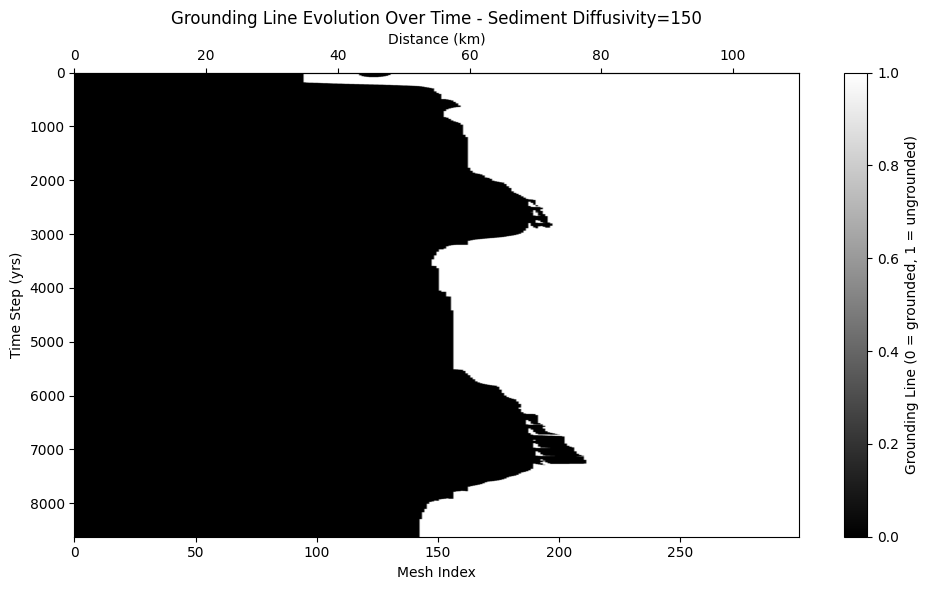

In [49]:
GL_dict = DATA_dict_kdiff_150['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_150)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [62]:
## Sediment Diffusivity ##
title_kdiff_cycles = str("Cycle Frequency: Sediment Diffusivity ")
KDIFFs = np.array([0, 5, 10, 15, 20, 25, 30])
KDIFF_cycles = np.array([11.75, 12, 11.75, 11.7, 11.5, 11.25, 11.75])
KDIFF_coeff = np.polyfit(KDIFFs,KDIFF_cycles, 1)
p_KDIFF = np.poly1d(KDIFF_coeff)
KDIFF_y_trend = p_KDIFF(KDIFFs)
R_2_KDIFF =r2_score(KDIFF_cycles,p_KDIFF(KDIFFs))


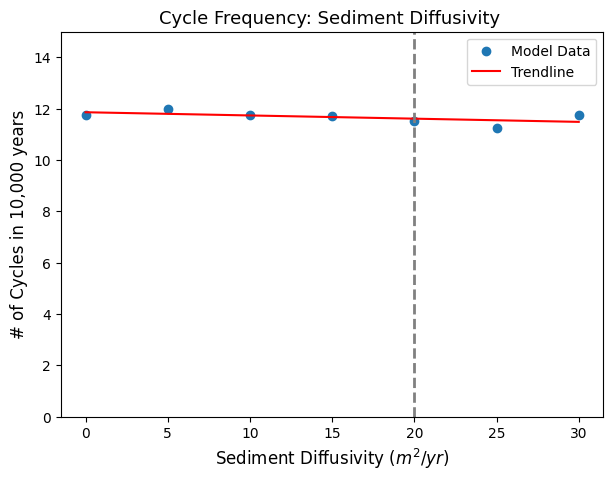

In [63]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.scatter(KDIFFs, KDIFF_cycles, label = 'Model Data')
plt.title(title_kdiff_cycles, fontsize =13)
plt.plot(KDIFFs, KDIFF_y_trend, color='red', label='Trendline')
# plt.text(0.25, 0.23, f'$R^2$: {R_2_KDIFF:.2f}', transform=plt.gca().transAxes, fontsize = 11)
# plt.text(0.2, 0.3, f'y = {KDIFF_coeff[0]:.2f}(x) + ({KDIFF_coeff[1]:.2f})', transform=plt.gca().transAxes, fontsize = 11)
plt.axvline(x=20, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Sediment Diffusivity ($m^2/yr$)", fontsize = 12)
plt.ylabel("# of Cycles in 10,000 years", fontsize =12)
# plt.xticks(np.arange(0, 2, 0.2))
plt.legend()
plt.ylim(0,15)
plt.show()

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SedDiff/#ofCycles_KDIFF.svg", format ="svg", bbox_inches='tight')


### Box and Whisker Plots

Variations in Cycle Period 

In [52]:
kdiffs = np.array([0,5,10,15,20,25,30])

Period_list = [periods_kdiff0, periods_kdiff5, periods_kdiff10, periods_kdiff15, periods_kdiff20, periods_kdiff25, periods_kdiff30]


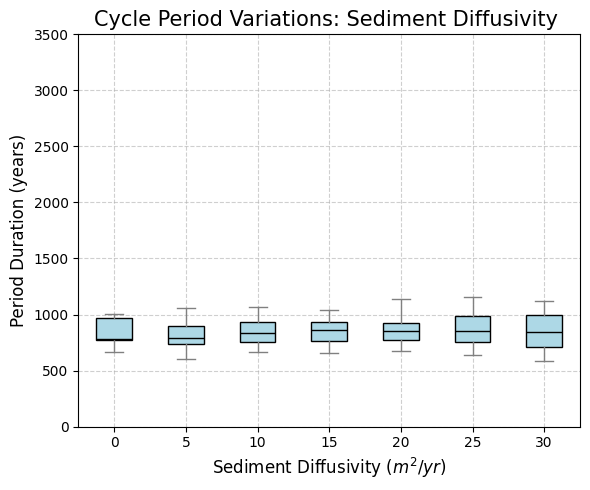

In [64]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations: Sediment Diffusivity ", fontsize = 15)
ax.set_ylabel("Period Duration (years)", fontsize = 12)
plt.xlabel("Sediment Diffusivity ($m^2/yr$)", fontsize = 12)
ax.set_xticks(np.arange(1, len(kdiffs) + 1))
ax.set_xticklabels(kdiffs)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(0,3500)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SedDiff/Period_Variations_KDIFF.svg", format ="svg", bbox_inches='tight')


Variations in GL Extent - Advance 

In [54]:
ExtPos_list = [adv_dists_kdiff0, adv_dists_kdiff5, adv_dists_kdiff10, adv_dists_kdiff15, adv_dists_kdiff20, adv_dists_kdiff25, adv_dists_kdiff30]


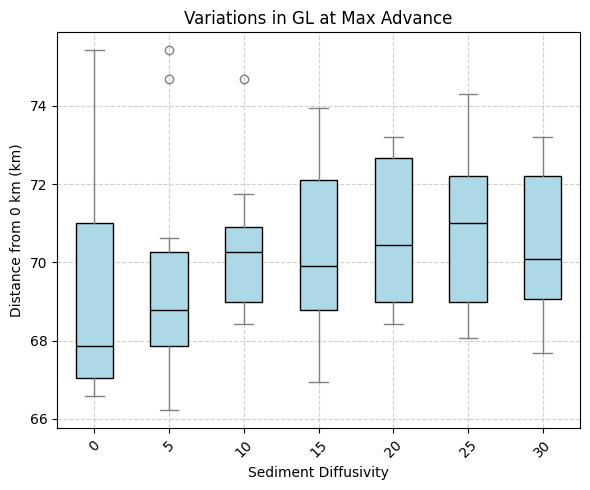

In [55]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Sediment Diffusivity")
ax.set_xticks(np.arange(1, len(kdiffs) + 1))
ax.set_xticklabels(kdiffs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [56]:
RetPos_list = [ret_dists__kdiff0, ret_dists__kdiff5, ret_dists__kdiff10, ret_dists__kdiff15, ret_dists__kdiff20, ret_dists__kdiff25, ret_dists__kdiff30]

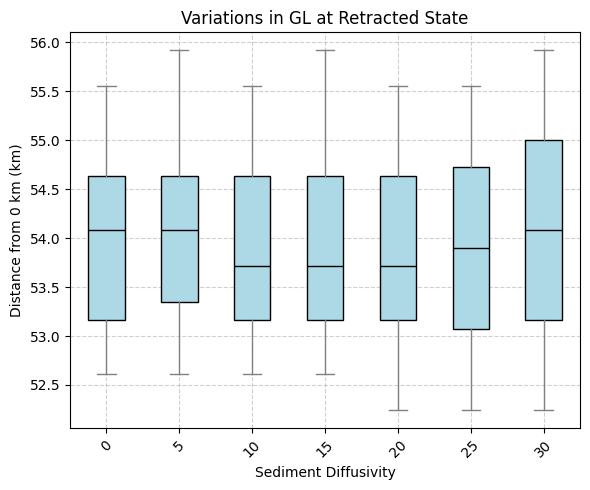

In [57]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Sediment Diffusivity")
ax.set_xticks(np.arange(1, len(kdiffs) + 1))
ax.set_xticklabels(kdiffs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

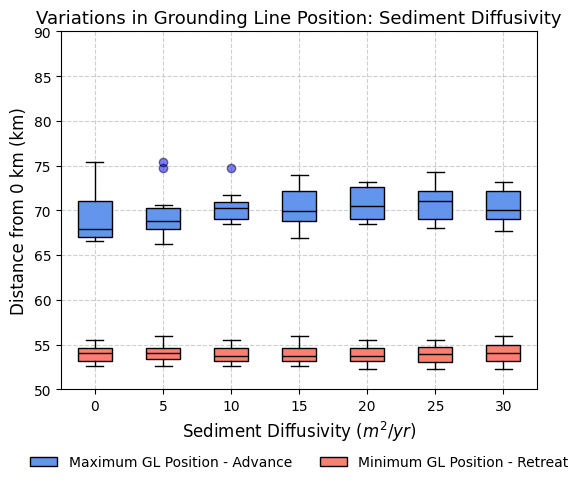

In [58]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='cornflowerblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='blue', alpha=0.5))

ax.set_title("Variations in Grounding Line Position: Sediment Diffusivity", fontsize = 13)
ax.set_ylabel("Distance from 0 km (km)", fontsize = 12)
plt.xlabel("Sediment Diffusivity ($m^2/yr$)", fontsize = 12)
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(kdiffs) + 1))
ax.set_xticklabels(kdiffs)
ax.set_ylim(50,90)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SedDiff/GL_Variation_KDIFF.svg", format ="svg", bbox_inches='tight')

In [59]:
surf_vels =[us_dict0,us_dict5, us_dict10, us_dict15, us_dict20, us_dict25, us_dict30]
surf_vels =[us_dict0, us_dict10, us_dict20, us_dict30]


In [60]:
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

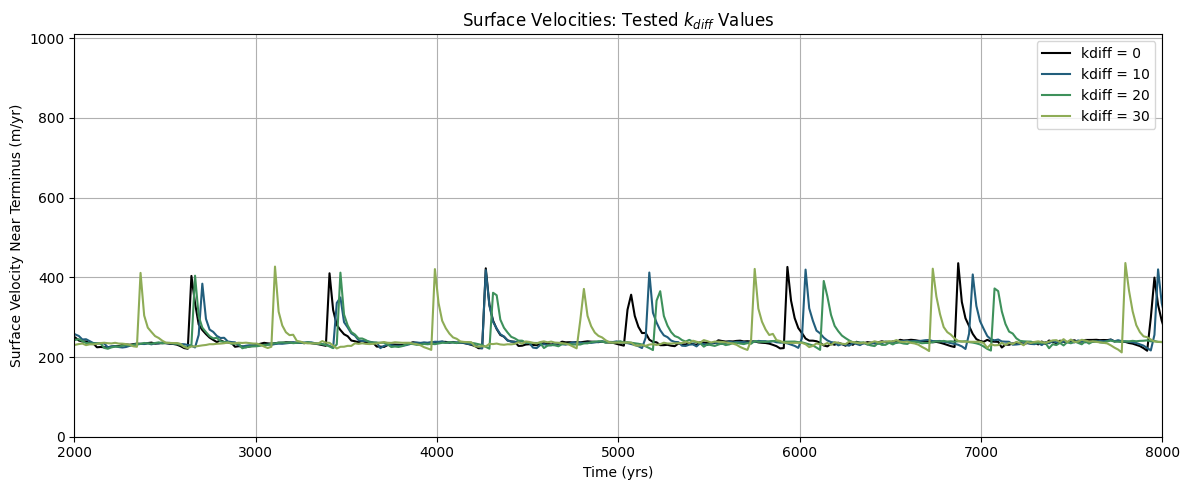

In [61]:
from scipy.interpolate import interp1d

common_times = np.linspace(0, 10000, 500)
cmap = plt.colormaps['gist_earth']
# cmap = truncate_colormap(cmap, 0.25, 1.0)
cmap = truncate_colormap(cmap, 0.0, 0.6)
colors = cmap(np.linspace(0, 1, len(surf_vels)))

fig, ax = plt.subplots(figsize=(12,5))

for i, us_dict in enumerate(surf_vels):
    term_surface_velocity = []
    times = []

    for t in sorted(us_dict.keys()):
        us_ = us_dict[t]
        notNAN = np.where(np.isfinite(us_))[0]

        if len(notNAN) > 0:
            terminus = notNAN[-1]
        else:
            terminus = None

        if terminus is not None and terminus >= 50:
            term_usvel = us_[terminus - 50]
        else:
            term_usvel = 0

        if np.isnan(term_usvel):
            term_usvel = 0

        term_surface_velocity.append(term_usvel)
        times.append(t)

    times = np.array(times)
    term_surface_velocity = np.array(term_surface_velocity)

    # Sort for interpolation
    sorted_indices = np.argsort(times)
    times = times[sorted_indices]
    term_surface_velocity = term_surface_velocity[sorted_indices]

    # Interpolate to common time grid
    interp_func = interp1d(times, term_surface_velocity, bounds_error=False, fill_value="extrapolate")
    interp_speeds = interp_func(common_times)

    plt.plot(common_times, interp_speeds, label=f'kdiff = {i*10}', color=colors[i])

plt.xlabel('Time (yrs)')
plt.ylabel('Surface Velocity Near Terminus (m/yr)')
plt.legend()
plt.title('Surface Velocities: Tested $k_{diff}$ Values')
plt.xlim(2000,8000)
plt.ylim(0,1010)
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SedDiff/Vel_kdiff.svg", format ="svg", bbox_inches='tight')